In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# configurar salida de gráficos en el notebook
%matplotlib inline

In [2]:
# cargar dataset desde archivo csv en dataframe 'df'
df = pd.read_csv('../data/insurance.csv')

# mostrar primeras 5 filas del dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# mostrar información del dataframe (columnas, tipos, nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# calcular matriz de correlación de columnas numéricas
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


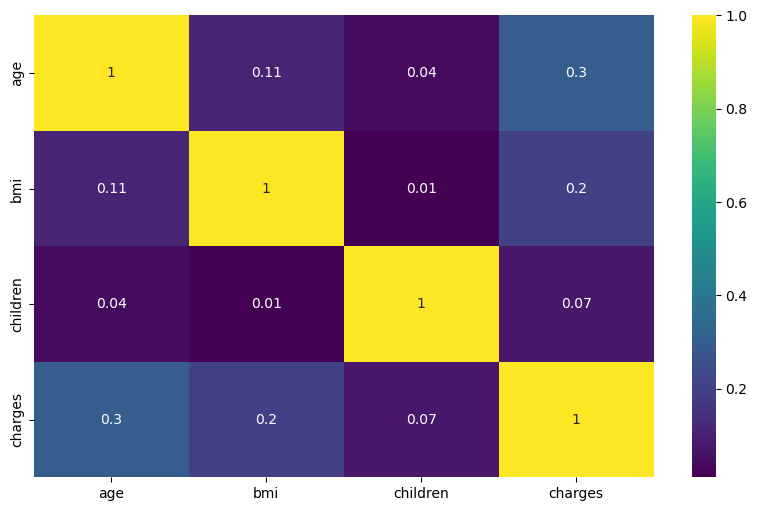

In [5]:
# configurar tamaño figura
plt.figure(figsize=(10, 6))
# gráfica mapa calor de correlaciones numéricas
sns.heatmap(df.corr(numeric_only=True).round(2), annot=True, cmap='viridis')
# mostrar figura
plt.show()

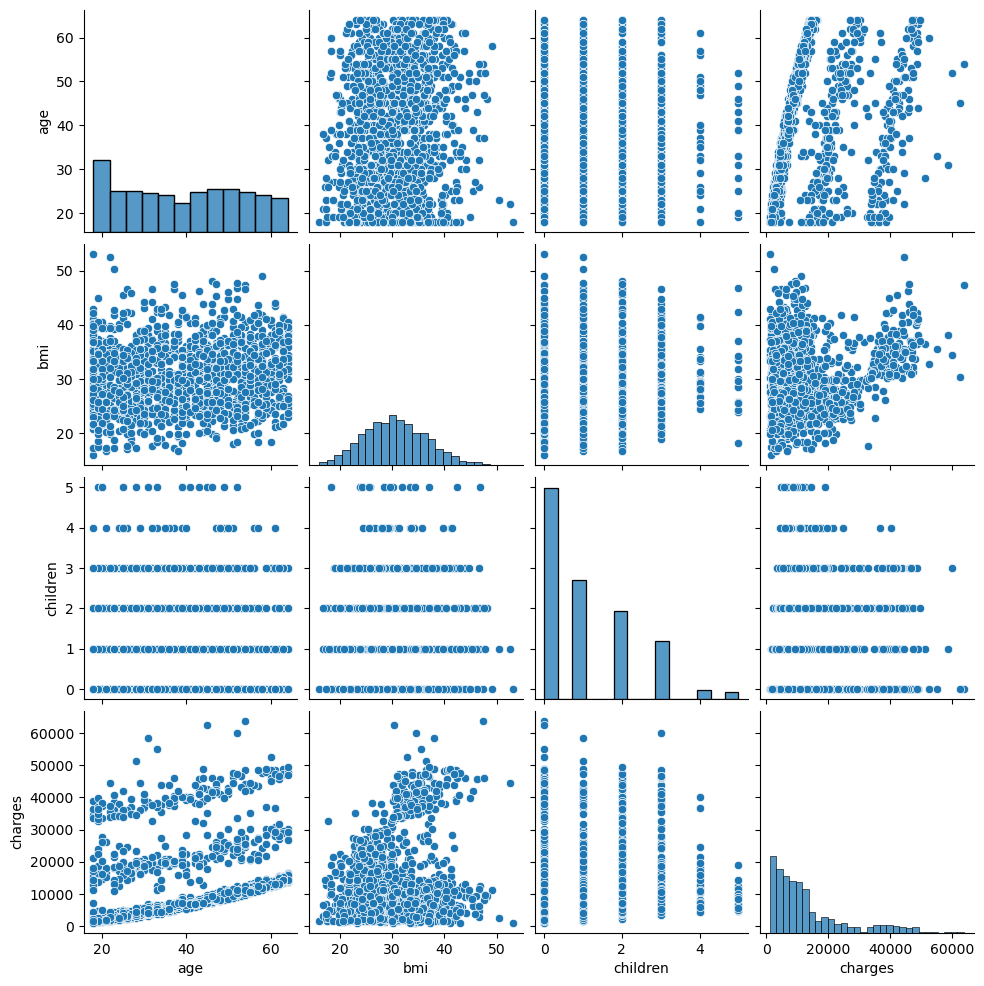

In [6]:
# gráfica pairplot, observar distribución y relaciones
sns.pairplot(df)
plt.show()

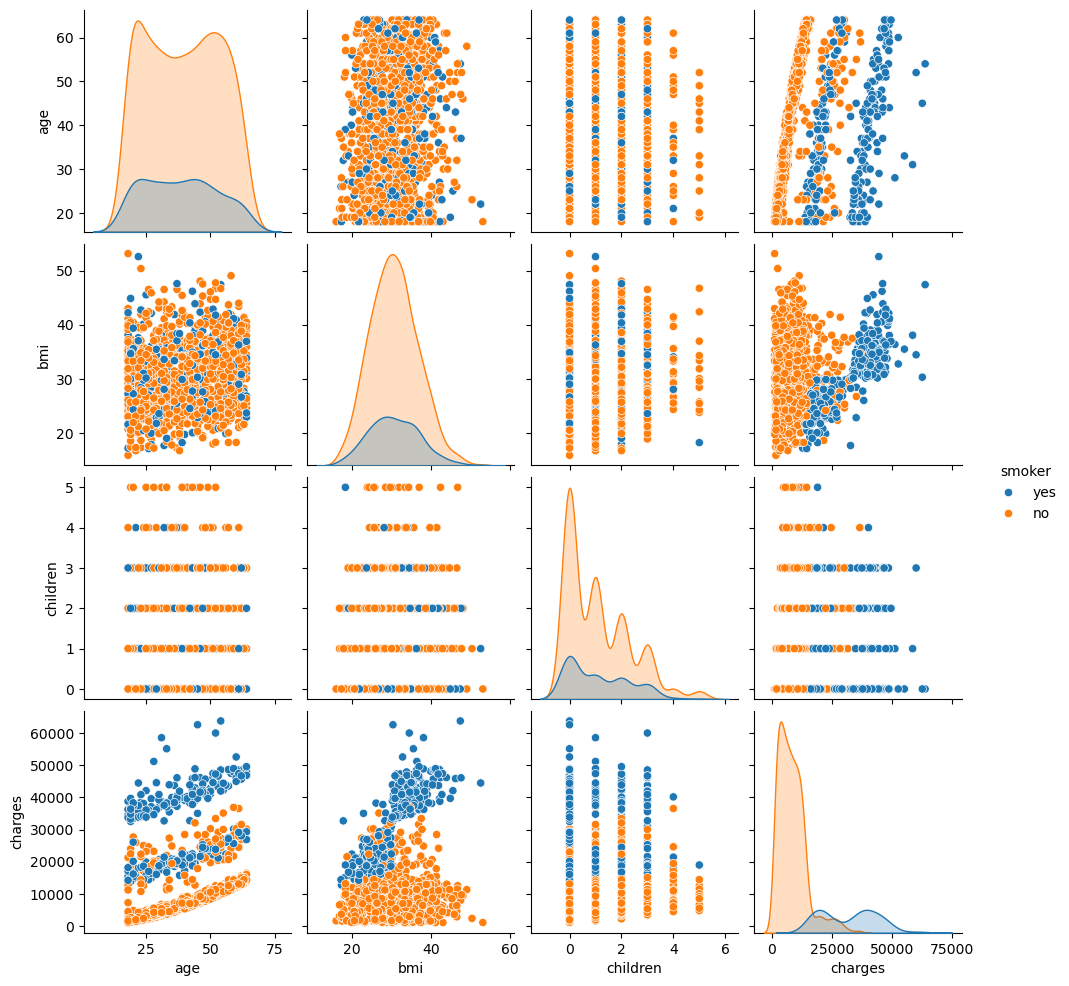

In [7]:
# gráfica pairplot, diferenciar variable 'smoker'
sns.pairplot(df, hue='smoker')
# mostrar figura
plt.show()

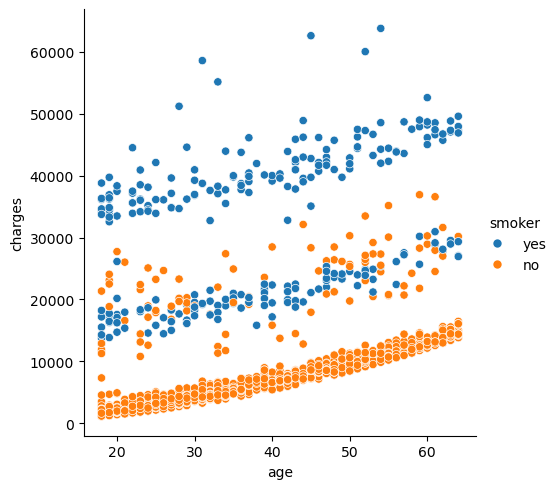

In [8]:
# graficar relación entre 'age' y 'charges', diferenciar fumador
sns.relplot(data=df, x='age', y='charges', hue='smoker')
# mostrar figura
plt.show()

In [9]:
# mostrar columna 'smoker'
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [10]:
# definir filtro para registros con 'smoker' == 'no'
filter = df['smoker'] == 'no'
# crear dataframe no fumadores
df_non_smokers = df[filter]
# mostrar primeras filas
df_non_smokers.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


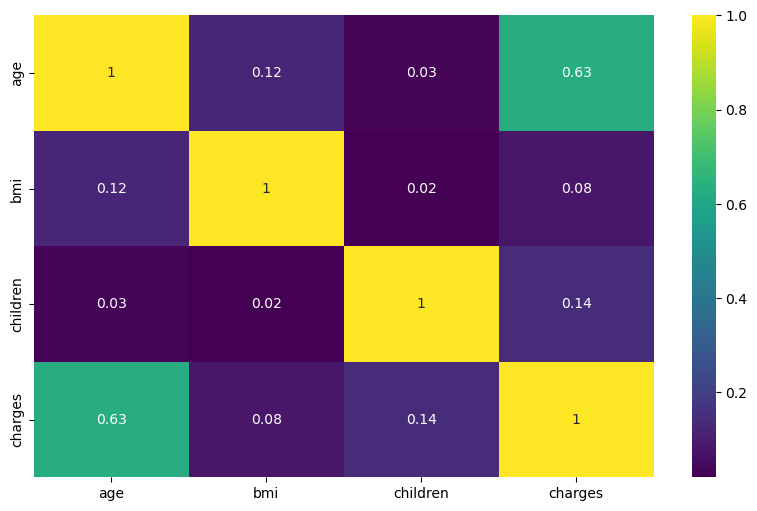

In [11]:
# configurar tamaño figura
plt.figure(figsize=(10, 6))
# graficar mapa calor de correlaciones en no fumadores
sns.heatmap(df_non_smokers.corr(numeric_only=True).round(2), annot=True, cmap='viridis')
# mostrar figura
plt.show()

## Regresión simple

In [12]:
# definir x como columna 'age' en no fumadores
X = df_non_smokers[['age']]
X.ndim

2

In [13]:
# definir y como columna 'charges' en no fumadores
y = df_non_smokers['charges']
y.ndim

1

In [14]:
# crear modelo de regresión lineal
model = LinearRegression()

In [15]:
# importar función para separar dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# separar datos en entrenamiento (75%) y prueba (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
# entrenar modelo con datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# predecir con datos de prueba
y_pred = model.predict(X_test)

In [18]:
# calcular r2 y mae
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# imprimir resultados con 4 decimales
print('r2: ', round(r2, 4))
print('mae: ', round(mae, 4))

r2:  0.4392
mae:  2518.6883


## Regresión múltiple

In [19]:
# definir x con 'age', 'bmi', 'children' en no fumadores
X = df_non_smokers[['age', 'bmi', 'children']] # input
# definir y como 'charges'
y = df_non_smokers['charges'] # output

In [20]:
# separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
# crear modelo lineal y entrenar
model = LinearRegression()
model.fit(X_train, y_train)

# predecir valores
y_pred = model.predict(X_test)

# calcular r2 y mae
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# imprimir resultados
print('r2: ', round(r2, 4))
print('mae: ', round(mae, 4))

r2:  0.448
mae:  2466.2957


## Crear una nueva feature de entrada

In [22]:
# mostrar columna 'smoker'
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [23]:
# transformar 'smoker' de categórico a numérico
df['smoker'].map({
    'yes': 1,
    'no': 0
})

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [24]:
# asignar transformación a nueva columna 'smoker_int'
df['smoker_int'] = df['smoker'].map({
    'yes': 1,
    'no': 0
})
# mostrar primeras filas
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_int
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [25]:
# definir x con 'age', 'bmi', 'children', 'smoker_int']]
X = df[['age', 'bmi', 'children', 'smoker_int']] # input
# definir y como 'charges'
y = df['charges'] # output

In [26]:
# separar dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LinearRegression()
# entrenar modelo
# model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# predecir con datos de prueba
y_pred = model.predict(X_test)

# calcular r2 y mae
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('r2: ', round(r2, 4))
print('mae: ', round(mae, 4))

r2:  0.7654
mae:  4265.9518


In [27]:
# obtener coeficientes del modelo
coefficients = model.coef_
coefficients

array([  260.00849987,   327.57844442,   435.24021194, 23632.63999974])

In [28]:
# obtener intercept del modelo
intercept = model.intercept_
intercept

-12268.326378050351

In [29]:
# definir función para calcular 'charges' usando coeficientes del modelo
def calculate_charges(age, bmi, children, smoker):
    return (age * coefficients[0]) + (bmi * coefficients[1]) + (children * coefficients[2]) + (smoker * coefficients[3]) + intercept

In [30]:
# probar función con valores 19, 27.90, 0, 1
print(calculate_charges(19, 27.90, 0, 1))

25443.913718481755


In [31]:
# comparar con predicción directa del modelo
model.predict([[19, 27.90, 0, 1]])

d:\Nueva carpeta\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25443.91371848])